<a href="https://colab.research.google.com/github/DerinOgrenme2021/GizemUnal/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

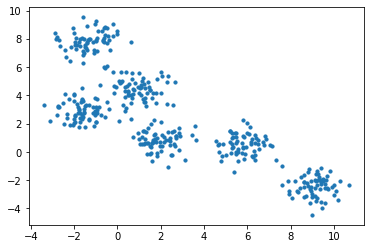

In [9]:
from sklearn.datasets.samples_generator import make_blobs
X,y = make_blobs(n_samples=400, centers=6, cluster_std=0.7, random_state=0)
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1], s=10)

In [12]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=6)
kmeans.fit(X)
y_kmeans=kmeans.predict(X)
y_kmeans


array([1, 0, 4, 0, 2, 0, 2, 2, 5, 4, 0, 1, 5, 2, 0, 2, 0, 3, 5, 4, 2, 5,
       5, 4, 3, 1, 0, 2, 0, 2, 2, 4, 4, 2, 5, 4, 3, 4, 1, 1, 0, 3, 4, 0,
       2, 1, 3, 5, 2, 4, 4, 2, 5, 2, 4, 0, 0, 3, 2, 0, 3, 2, 0, 3, 2, 4,
       4, 3, 0, 3, 5, 5, 2, 5, 4, 0, 1, 5, 1, 4, 1, 1, 1, 4, 1, 4, 2, 3,
       3, 5, 1, 2, 4, 2, 4, 1, 4, 0, 5, 3, 3, 1, 1, 0, 5, 0, 0, 0, 5, 0,
       2, 4, 1, 3, 0, 4, 5, 1, 4, 5, 1, 2, 3, 3, 1, 0, 5, 0, 4, 0, 3, 2,
       1, 3, 2, 2, 2, 1, 5, 3, 3, 1, 0, 5, 0, 3, 5, 3, 0, 5, 3, 3, 1, 1,
       0, 5, 0, 4, 0, 1, 4, 2, 4, 3, 3, 2, 4, 2, 3, 0, 5, 1, 1, 0, 3, 3,
       0, 0, 4, 2, 1, 3, 1, 2, 3, 2, 0, 2, 3, 5, 3, 5, 1, 5, 3, 0, 5, 3,
       2, 2, 0, 5, 5, 0, 1, 5, 5, 1, 3, 4, 3, 3, 2, 2, 5, 5, 0, 4, 2, 3,
       5, 1, 3, 5, 1, 0, 5, 4, 2, 2, 1, 4, 4, 3, 4, 1, 4, 5, 3, 3, 0, 3,
       2, 1, 5, 3, 5, 0, 5, 5, 1, 1, 4, 0, 4, 0, 4, 0, 1, 5, 4, 0, 2, 5,
       0, 5, 2, 1, 5, 0, 0, 0, 1, 4, 5, 5, 4, 4, 4, 4, 4, 3, 3, 4, 3, 4,
       4, 2, 2, 1, 2, 2, 1, 1, 3, 2, 5, 4, 3, 5, 2,

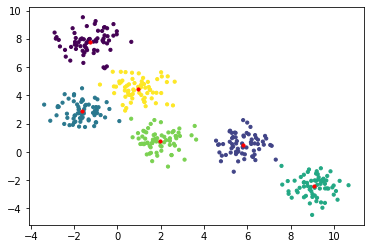

In [15]:
plt.scatter(X[:,0],X[:,1], c=y_kmeans, s=10)
cent=kmeans.cluster_centers_
plt.scatter(cent[:,0],cent[:,1], c='red', s=10)

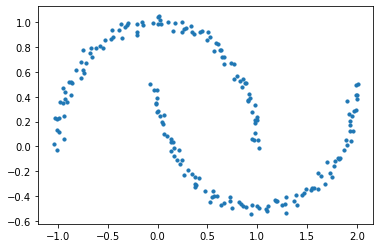

In [17]:
from sklearn.datasets import  make_moons
X,y = make_moons(200, noise=0.03, random_state=0)
plt.scatter(X[:,0],X[:,1], s=10)

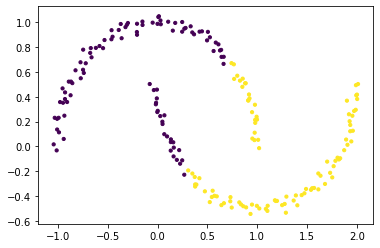

In [20]:
y_pred=KMeans(2,random_state=0).fit_predict(X)
plt.scatter(X[:,0],X[:,1], c=y_pred, s=10)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


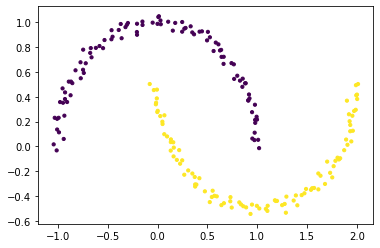

In [24]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels= model.fit_predict(X)
plt.scatter(X[:,0],X[:,1], c=labels, s=10)

In [34]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
digits= load_digits()
print(digits.data.shape)

kmeans= KMeans(n_clusters=10, random_state=0)
clusters=kmeans.fit_predict(digits.data)
centers=kmeans.cluster_centers_
print(centers.data.shape)

(1797, 64)
(10, 64)


(10, 64)

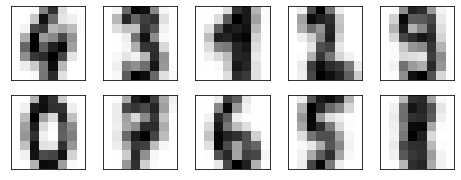

In [35]:
fig,ax=plt.subplots(2,5,figsize=(8,3))

centers=kmeans.cluster_centers_.reshape(10,8,8)

for axi, c in zip(ax.flat, centers):
  axi.set(xticks=[], yticks=[])
  axi.imshow(c,interpolation='nearest', cmap=plt.cm.binary)

In [36]:
clusters

array([5, 9, 9, ..., 9, 4, 4], dtype=int32)

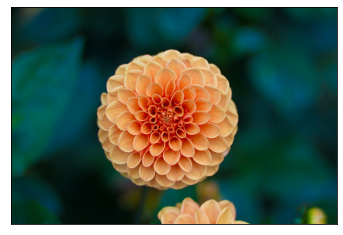

In [37]:
from sklearn.datasets import load_sample_image
flower=load_sample_image("flower.jpg")
ax= plt.axes(xticks=[],yticks=[])
ax.imshow(flower)

In [40]:
flower.shape

(427, 640, 3)

In [42]:
data=flower/255.0
data=data.reshape(427*640,3)
data.shape

(273280, 3)

In [44]:
from sklearn.cluster import MiniBatchKMeans
kmeans= MiniBatchKMeans(16)
kmeans.fit(data)
new_color=kmeans.cluster_centers_[kmeans.predict(data)]
new_color

array([[0.00901694, 0.06530612, 0.04561825],
       [0.00901694, 0.06530612, 0.04561825],
       [0.00901694, 0.06530612, 0.04561825],
       ...,
       [0.02435897, 0.18165535, 0.13041101],
       [0.02435897, 0.18165535, 0.13041101],
       [0.02435897, 0.18165535, 0.13041101]])

Text(0.5, 1.0, 'Compressed Image')

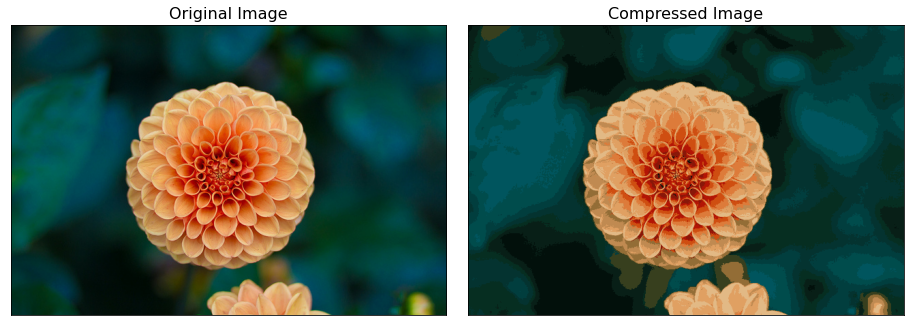

In [47]:
flower_compressed= new_color.reshape(flower.shape)
fig,ax=plt.subplots(1,2,figsize=(16,6),subplot_kw=dict(xticks=[],yticks=[]))

fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title("Original Image",size=16)
ax[1].imshow(flower_compressed)
ax[1].set_title("Compressed Image",size=16)
